In [1]:
import pandas as pd 
import numpy as np

In [5]:
df1=pd.read_csv("C:/Users/admin/Desktop/amazon web scrap/amazon-web-scrape2.csv")

In [6]:
df1.head()

,web-scraper-order,web-scraper-start-url,author,title,date,content,rating,next,next-href
0,1567324939-211,https://www.amazon.com/Screen-Protector-SPARIN...,Richard N.,Nice product could have better installation me...,"January 12, 2018",It was packaged nicely and contained all the n...,4.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
1,1567324907-167,https://www.amazon.com/Screen-Protector-SPARIN...,Claudia Rocha,Great experience despite negative reviews!,"March 21, 2019",I was very hesitant in purchasing this screen ...,5.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
2,1567324878-113,https://www.amazon.com/Screen-Protector-SPARIN...,John,A Great Product on The Second Try!,"August 8, 2018",I purchased this product for the iPad 9.7 inch...,5.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
3,1567324884-129,https://www.amazon.com/Screen-Protector-SPARIN...,DJB,Cleanliness and patience.,"August 29, 2019",Won’t know about impact protection until somet...,5.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...
4,1567324920-185,https://www.amazon.com/Screen-Protector-SPARIN...,Love2Shop,I'm so glad I took a chance and ordered this!,"December 20, 2016",I went to the mall the other day to have the t...,5.0 out of 5 stars,Next page→,https://www.amazon.com/Screen-Protector-SPARIN...


In [7]:
df1.shape

(420, 9)

In [8]:
from PIL import Image

In [10]:
# clean up the dataset to remove unnecessary columns
df1.drop(['next','next-href','web-scraper-start-url','web-scraper-order'], axis = 1, inplace = True)

In [11]:
df1.head()

,author,title,date,content,rating
0,Richard N.,Nice product could have better installation me...,"January 12, 2018",It was packaged nicely and contained all the n...,4.0 out of 5 stars
1,Claudia Rocha,Great experience despite negative reviews!,"March 21, 2019",I was very hesitant in purchasing this screen ...,5.0 out of 5 stars
2,John,A Great Product on The Second Try!,"August 8, 2018",I purchased this product for the iPad 9.7 inch...,5.0 out of 5 stars
3,DJB,Cleanliness and patience.,"August 29, 2019",Won’t know about impact protection until somet...,5.0 out of 5 stars
4,Love2Shop,I'm so glad I took a chance and ordered this!,"December 20, 2016",I went to the mall the other day to have the t...,5.0 out of 5 stars


In [13]:
# let's rename the columns so that they make sense
df1.rename (columns = {'content':'review'}, inplace = True)

In [14]:
df1.head()

,author,title,date,review,rating
0,Richard N.,Nice product could have better installation me...,"January 12, 2018",It was packaged nicely and contained all the n...,4.0 out of 5 stars
1,Claudia Rocha,Great experience despite negative reviews!,"March 21, 2019",I was very hesitant in purchasing this screen ...,5.0 out of 5 stars
2,John,A Great Product on The Second Try!,"August 8, 2018",I purchased this product for the iPad 9.7 inch...,5.0 out of 5 stars
3,DJB,Cleanliness and patience.,"August 29, 2019",Won’t know about impact protection until somet...,5.0 out of 5 stars
4,Love2Shop,I'm so glad I took a chance and ordered this!,"December 20, 2016",I went to the mall the other day to have the t...,5.0 out of 5 stars


In [15]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [16]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

^C


In [19]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [21]:
stopwords = set(STOPWORDS)

In [28]:
text = df1.review[100]

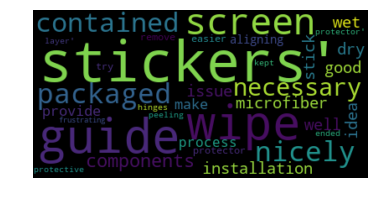

In [25]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 54000x39600 with 0 Axes>

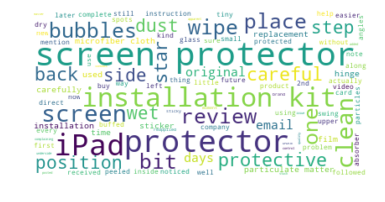

In [40]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=200, max_words=100, background_color="white").generate(text)

fig = plt.figure(figsize=(2000,2000))
fig.set_figwidth(750) # set width
fig.set_figheight(550)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
wordcloud.to_file("img/first_review.png")

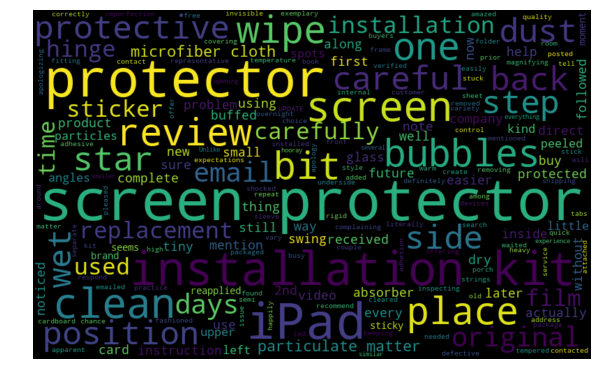

In [42]:
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
#sentiment analysis

In [44]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [45]:
#text normalization
tokenized_review = df1['review'].apply(lambda x: x.split()) # tokenizing 
tokenized_review.head()

0    [It, was, packaged, nicely, and, contained, all, the, necessary, components, for, installation--wet, wipe,, dry, wipe,, microfiber., The, only, issue, was, the, 'guide, stickers', didn't, stick, v...
1    [I, was, very, hesitant, in, purchasing, this, screen, protector, because, of, all, the, negative, reviews, and, to, be, honest, some, of, the, positive, reviews, sounded, fake,, but, i, figured, ...
2    [I, purchased, this, product, for, the, iPad, 9.7, inch., At, first,, I, was, highly, disappointed, with, the, quality, of, the, product., I, followed, the, instructions, in, the, book, it, gave, ...
3    [Won’t, know, about, impact, protection, until, something, happens, but, it, seems, quite, strong., The, install, procedure, worked, well., Clean, until, your, sure, there’s, nothing, on, the, sur...
4    [I, went, to, the, mall, the, other, day, to, have, the, tempered, glass, protector, applied, for, me, on, two, iPad, Airs., They, wanted, to, charge, me, $45, for, each, one.

In [46]:
#normalize the tokenized tweets
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_review = tokenized_review.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
#stitch these tokens back together
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])    
df1['review'] = tokenized_review

In [47]:
tokenized_review.head()

0    It wa packag nice and contain all the necessari compon for installation--wet wipe, dri wipe, microfiber. the onli issu wa the 'guid stickers' didn't stick veri well. It is a good idea to provid th...
1    I wa veri hesit in purchas thi screen protector becaus of all the neg review and to be honest some of the posit review sound fake, but i figur worst case scenario i’m out $10 and lesson learned. a...
2    I purchas thi product for the ipad 9.7 inch. At first, I wa highli disappoint with the qualiti of the product. I follow the instruct in the book it gave but the end result wa terrible. I couldn't ...
3    won’t know about impact protect until someth happen but it seem quit strong. the instal procedur work well. clean until your sure there’ noth on the surfac then clean a coupl more times. one small...
4    I went to the mall the other day to have the temper glass protector appli for me on two ipad airs. they want to charg me $45 for each one. I wa hesit on weather to take a chan